# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary.

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`.

In [15]:
# your answer here
employee = pd.read_csv('data/Employee.csv')
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### What's the mean salary by department?
Hint : There are 2 ways to do it - one way is with and the other way is without pivot tables. Do it both ways. 


In [7]:
# Method 1
employee.groupby('Department').agg({'Salary':'mean'})

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


In [10]:
# Method 2
employee.pivot_table(values = ['Salary'], index=["Department"])

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title.

In [11]:
employee.pivot_table(values=['Salary'], index=['Department', 'Title'])

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table.
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [12]:
employee.pivot_table(index=['Title'], values=['Salary'], columns=['Years'])

Salary                              
Years          1     2     3     4     7     8
Title                                         
VP           NaN   NaN   NaN   NaN   NaN  70.0
analyst     35.0  30.0   NaN  35.0   NaN   NaN
associate    NaN  55.0  55.0   NaN  60.0   NaN

#### We want to know the information about the mean salary and number of employees in each department and for each job title.

In [14]:
employee.pivot_table(index=['Department', 'Title'], aggfunc = {'Salary':'mean', 'Name':'count'})

Name  Salary
Department Title                  
HR         VP            1    70.0
           analyst       2    32.5
IT         VP            1    70.0
           analyst       2    32.5
           associate     1    60.0
Sales      associate     2    55.0

#### We want to know for each department and for each job title the Salary's median, minimum, maximum and standard deviation. Comment your results.

In [16]:
employee.pivot_table(index=['Department', 'Title'], aggfunc= {'Salary': ['min', 'median', 'max']})

Salary             
                        max median   min
Department Title                        
HR         VP          70.0   70.0  70.0
           analyst     35.0   32.5  30.0
IT         VP          70.0   70.0  70.0
           analyst     35.0   32.5  30.0
           associate   60.0   60.0  60.0
Sales      associate   55.0   55.0  55.0

#### Based on your comments, fill the missing values with an appropriate value.

*i'm not sure I understand! for some of these groups there is only one person, so the min, max and median are the same, should I replace by nans? I don't have nans! :(*

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [18]:
employee.pivot_table(index=['Department'], aggfunc = {'Salary':'sum', 'Name':'count'})

,Name,Salary
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each Department and Title, we want to know the the total years of work experience and the mean salary.

In [19]:
# your answer here
employee.pivot_table(index=['Department', 'Title'], aggfunc = {'Salary':'mean', 'Years':'sum'})

Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table.

Hint: Write a custom function.

In [43]:
employee.pivot_table(index=['Department'], aggfunc= {'Salary': lambda x: np.mean(x.replace(x.max(), np.nan))})

,Salary
Department,
HR,32.500000
IT,41.666667


# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`.

In [21]:
fitbit = pd.read_csv('data/Fitbit.csv')

#### Explore you dataset in terms of data types and descriptive statistics.
Hint: Use Pandas functions from previous lectures.

In [26]:
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


In [24]:
fitbit.dtypes

Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object

#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [46]:
# linear regression
x = fitbit['Minutes Very Active']
y = fitbit['Steps']

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

print ('The slope is: ' + str(slope))
print ('The intercept is: ' + str(intercept))
print ('The r_value is: ' + str(r_value**2))
print ('The std error is: ' + str(std_err))
print(p_value)

The slope is: 103.11259583058263
The intercept is: 6438.193102618697
The r_value is: 0.32655721470406096
The std error is: 7.750612041396089
3.357282499452931e-33


#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

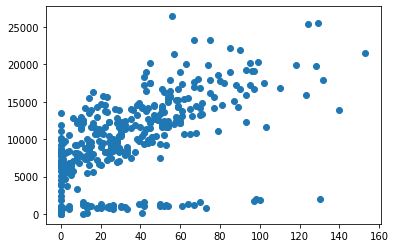

In [44]:
plt.scatter(fitbit['Minutes Very Active'], fitbit['Steps'])

#### What can you say about Minute Very Active and Steps? Write a comment below

*There's a correlation between these two variables, but a linear model only explains about 33% of the variation. There are quite a few points with high number of minutes active and no steps. Maybe working out in place like doing push ups? It's hard to interpret these dots because I don't know how these minutes of activity are quantified. If it is calculated from the heart rate then this could be someone sitting down and being very nervous! Like watching a horror movie.*

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [48]:
# linear regression
x = fitbit['Minutes Sedentary']
y = fitbit['Steps']

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

print ('The slope is: ' + str(slope))
print ('The intercept is: ' + str(intercept))
print ('The r_value is: ' + str(r_value**2))
print ('The std error is: ' + str(std_err))
print(p_value)

The slope is: 1.4595893198804288
The intercept is: 9298.475808397237
The r_value is: 0.00591454523785282
The std error is: 0.9904565431811202
0.14143690593734606


#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

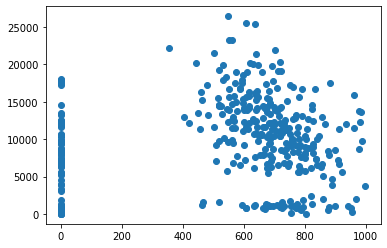

In [49]:
plt.scatter(fitbit['Minutes Sedentary'], fitbit['Steps'])

*these two variables are not significantly correlated with a linear model. there are a lot of points of high number of steps but very little activity, maybe walking a lot but not really increasding the heart rate? but i suspect that if we would separate these two clusters, the cluster to the right would show a significant correlation.*

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [50]:
# linear regression
x = fitbit['MinutesOfSleep']
y = fitbit['Steps']

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

print ('The slope is: ' + str(slope))
print ('The intercept is: ' + str(intercept))
print ('The r_value is: ' + str(r_value**2))
print ('The std error is: ' + str(std_err))
print(p_value)

The slope is: 4.735588289963671
The intercept is: 8745.996933951315
The r_value is: 0.017157242996841023
The std error is: 1.876055902990008
0.012018728392518043


#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

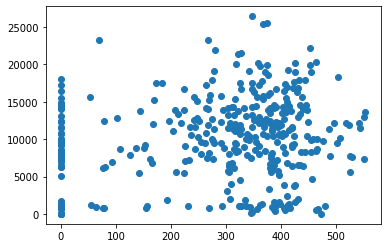

In [52]:
plt.scatter(fitbit['MinutesOfSleep'], fitbit['Steps'])

*there's a positive relationship between these variables but it is very weak. again there are a lot of points at zero minutes of sleep? who is this person and why are they doing all nighters so often??*

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [57]:
cor_fit = fitbit[['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']].corr()

#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [58]:
cor_fit['Steps'].sort_values(ascending= False)

Steps                  1.000000
Minutes Very Active    0.571452
Floors                 0.306511
Calorie burned         0.255305
MinutesOfSleep         0.130986
Minutes Sedentary      0.076906
Name: Steps, dtype: float64

*i would say Minutes Very Active, Floors and Calories are the highest correlated features.*

# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`.

In [31]:
# your answer here
time_grades = pd.read_csv('data/Time_Grades.csv')
time_grades

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9
5,Eva,5,3
6,Carlos,12,7
7,Pedro,6,5
8,Ana,18,9
9,Gervasio,7,3


#### Show visually the frequency distribution of the time_grades dataset.

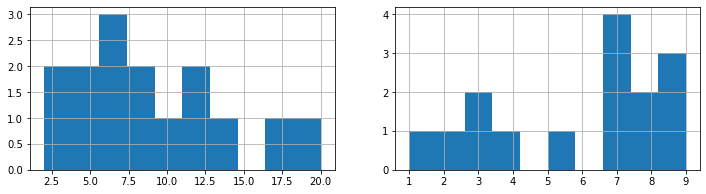

In [64]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 3))
time_grades['Study time'].hist(ax=ax1)
time_grades['Grade'].hist(ax=ax2)

#### Is there a correlation between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [66]:
x = time_grades['Study time']
y = time_grades['Grade']
pearson = stats.pearsonr(x, y)
spearman = stats.spearmanr(x, y)

print(pearson)
print(spearman)

(0.7980456073578857, 0.0003627635256342742)
SpearmanrResult(correlation=0.819658753036942, pvalue=0.00018377469445788485)


*They are correlated, but the spearman results in a slightly higher correlation coefficient. The difference between these two methods is that Pearson assumes data that are normally distributed while the Spearman is a non parametric measure. So for the data we are using here it looks like Spearman would be more adequate. But we should still run a test for normality before.*

#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

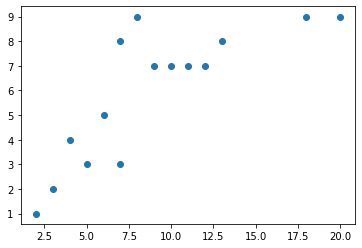

In [67]:
plt.scatter(x, y)

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

*I answered this question above*